Import Necessary Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

Download the dataset

In [18]:
url = 'https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip'
df = pd.read_csv(url)
print(df)

       3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]


Separate the features from labels, then construct the test and train matrices

In [19]:
features = df.iloc[:,0:4].values
clases = df.iloc[:,4].values

f_train, f_test, c_train, c_test = train_test_split(features, clases, test_size=0.2, train_size=0.8, random_state=42)

Construct the classifier and give the training data

In [20]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=None, random_state=21)
clf.fit(f_train, c_train)

DecisionTreeClassifier(criterion='entropy', random_state=21)

Predict the clases of the test data

In [21]:
c_pred = clf.predict(f_test)

Calculate the evalutaion metrics

In [22]:
print("Accuracy:", accuracy_score(c_test, c_pred))

conf_matrix = confusion_matrix(c_test, c_pred)
print(conf_matrix)
print(classification_report(c_test, c_pred))

Accuracy: 0.9854545454545455
[[147   1]
 [  3 124]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       148
           1       0.99      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



Plot the tree

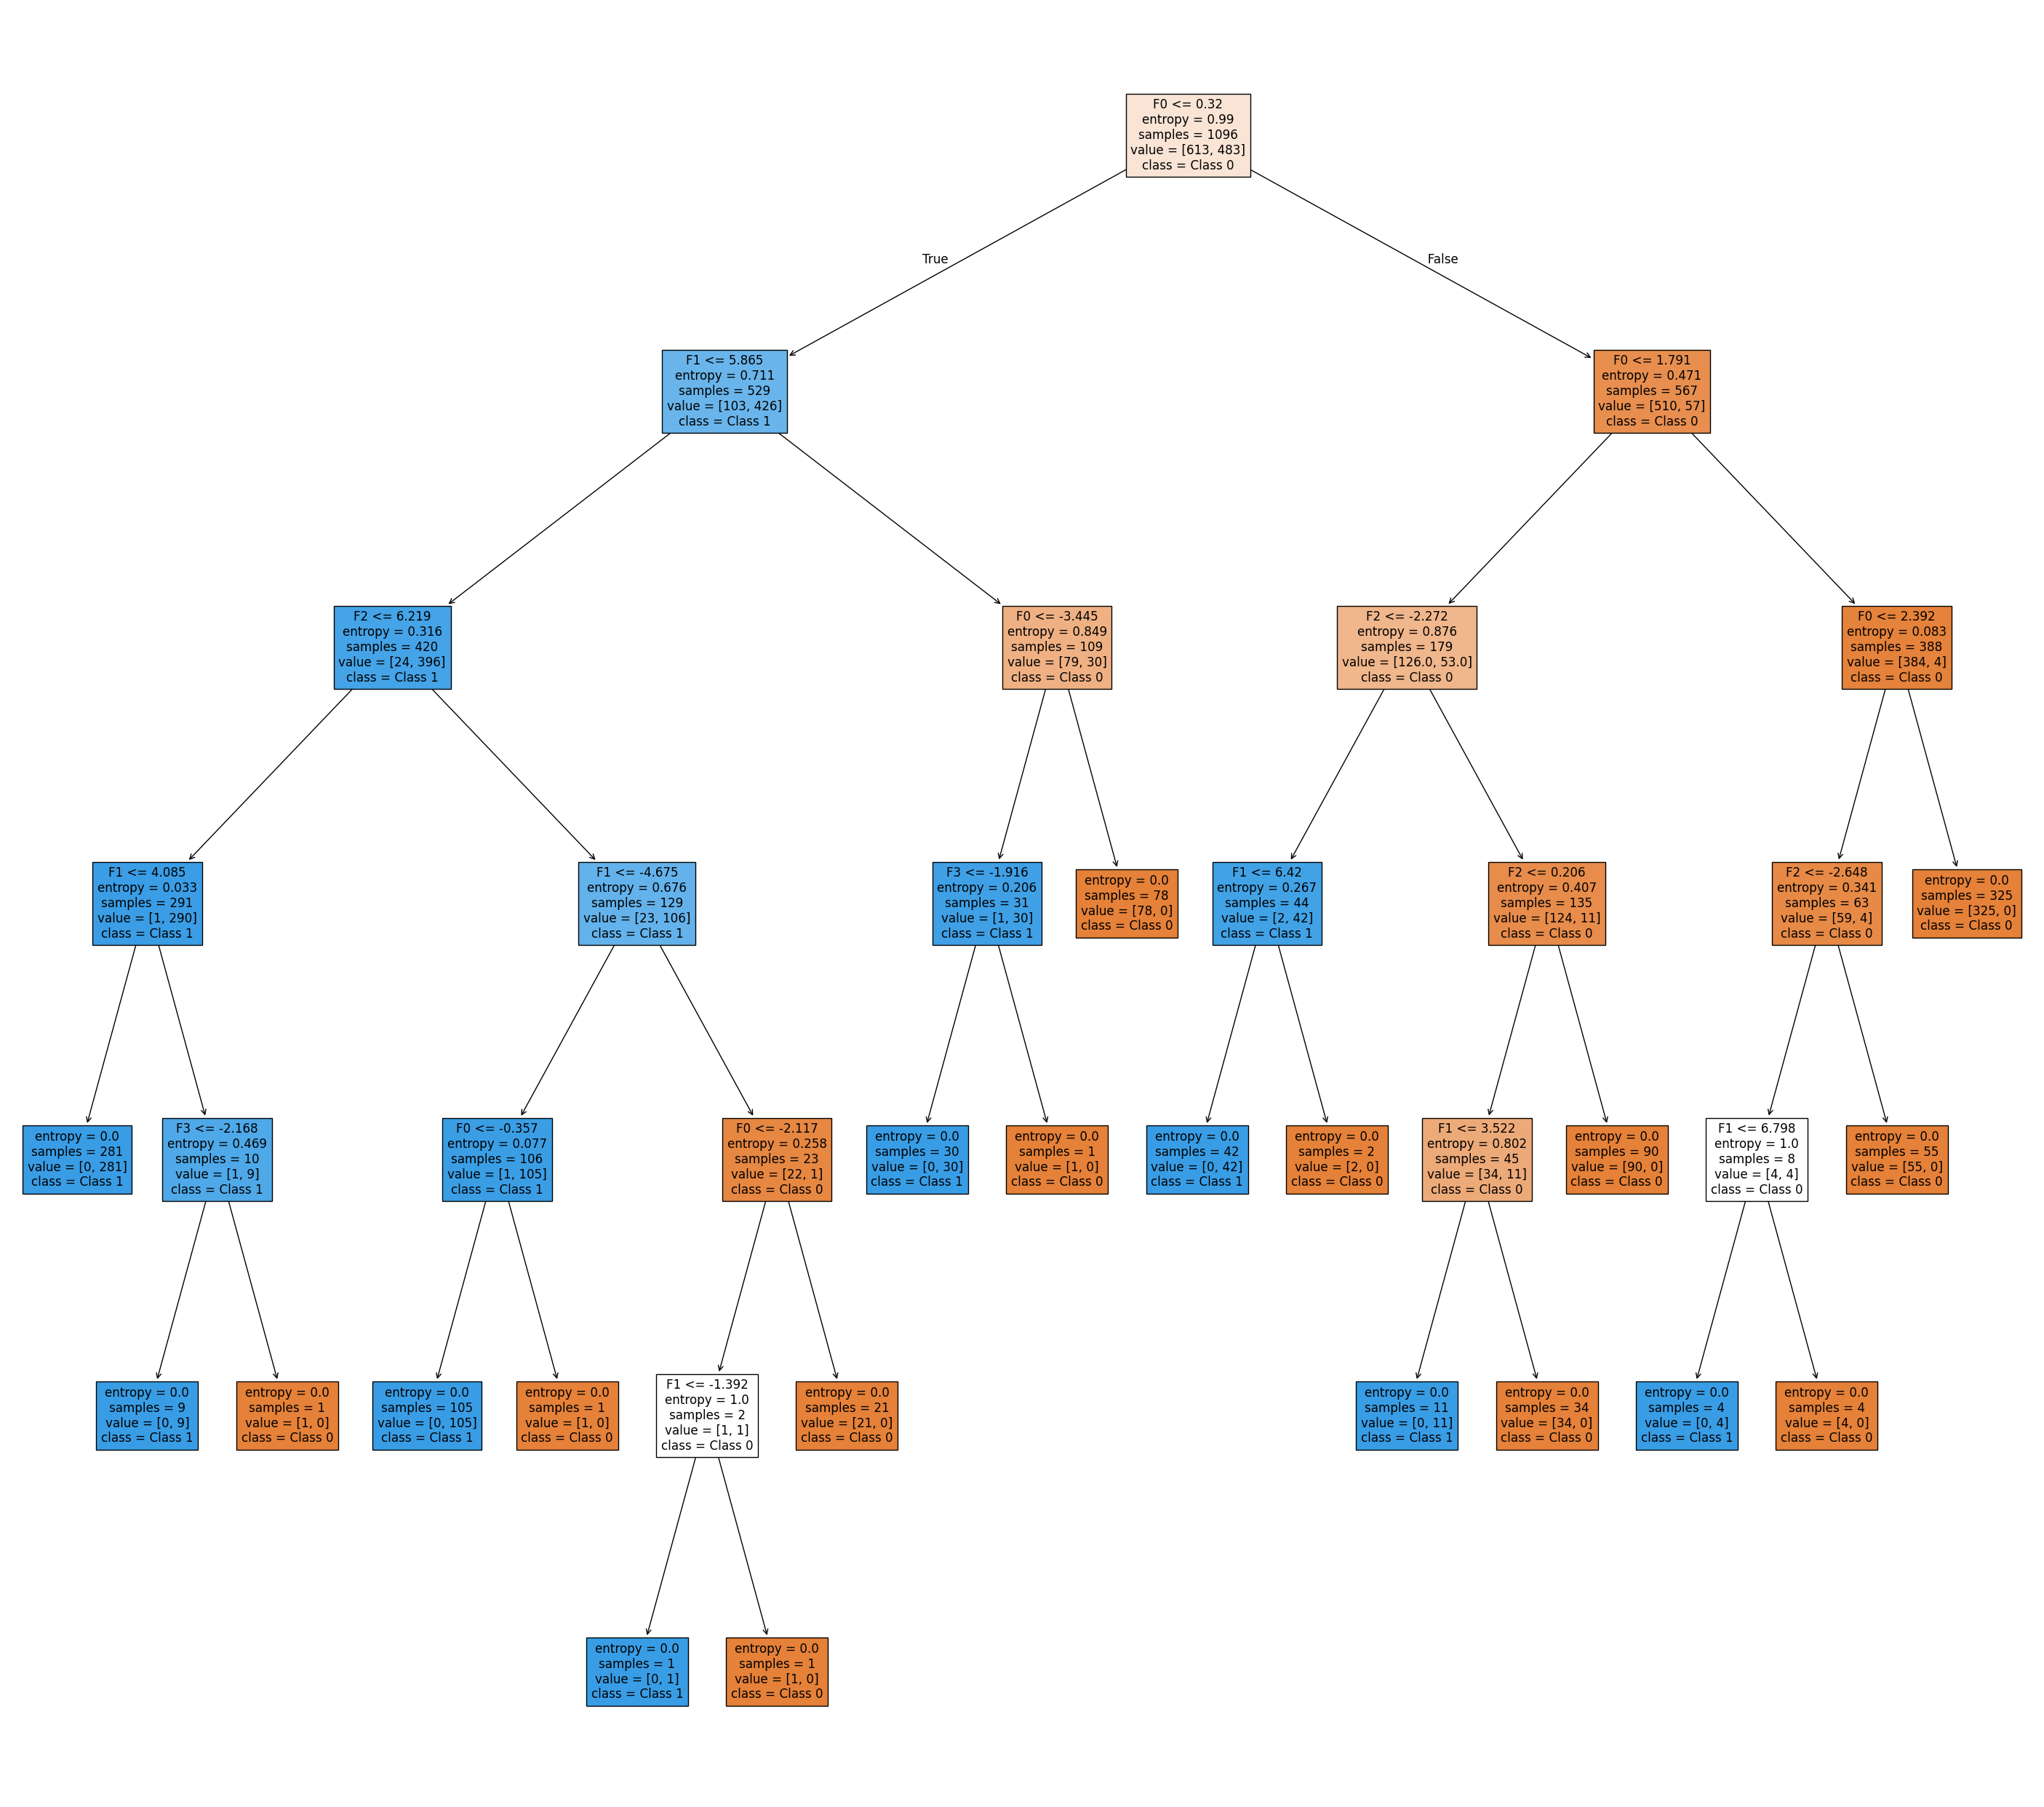

In [23]:
plt.figure(figsize=(36, 32))
plot_tree(clf, feature_names=["F0", "F1", "F2", "F3"], class_names=["Class 0", "Class 1"], filled=True)
plt.show()

Plot importance of the features

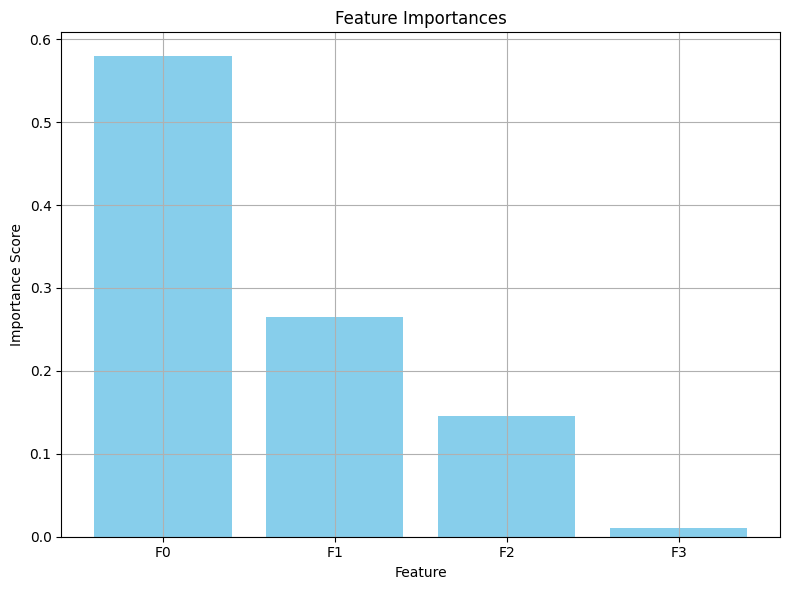

In [24]:
importances = clf.feature_importances_
feature_names = ["F0", "F1", "F2", "F3"]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()